In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.basemap import Basemap as Basemap
import geopandas as gpd

In [12]:
#import CSVs
AZcounties = pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/AZcounties.csv")
AZcounties

,Arizona Counties,1990,2000,2010,2020
0,Mohave,93497,156215,200336,217206
1,La Paz,13844,19611,20499,21480
2,Yuma,106895,160576,197148,217824
3,Coconino,96591,116773,134624,142481
4,Yavapai,107714,168608,210990,240226
5,Maricopa,2122000,3092000,3825000,4579000
6,Pinal,116397,181280,379206,480828
7,Santa Cruz,29676,38589,47402,46808
8,Gila,40216,51332,53565,54303
9,Navajo,77674,97689,107693,112112


In [13]:
CAcounties = pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/CAcounties.csv")
CAcounties

,California Counties,1990,2000,2010,2020
0,Imperial,109303,142410,174704,180625
1,San Bernadino,1418000,1718000,2041000,2189000
2,Riverside,1170000,1559000,2202000,2489000


In [14]:
Col_counties = pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/COcounties.csv")
Col_counties

,Colorado Counties,1990,2000,2010,2020
0,Moffat,11357,13147,13795,13144
1,Rio Blanco,6051,5986,6623,6342
2,Garfield,29974,44257,56072,60366
3,Mesa,93145,117631,146266,155603
4,Delta,20980,27877,30858,31067
5,Montrose,24423,33599,41182,43322
6,San Miguel,3653,6609,7358,8105
7,Ouray,2306,3775,4457,5001
8,Dolores,1504,1847,2069,2096
9,San Jaun,745,562,708,748


In [15]:
Nev_counties = pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/Nevada_counties.csv")
Nev_counties

,Nevada Counties,1990,2000,2010,2020
0,Clark,741368,1394000,1953000,2316000
1,Lincoln,3775,4179,5351,5159
2,White Pine,9264,9029,10027,9466
3,Nye,17781,32914,43848,48054


In [16]:
NMcounties = pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/NMcounties.csv")
NMcounties

,New Mexico Counties,1990,2000,2010,2020
0,San Juan,91605.0,114131.0,130209,123312
1,McKinley,60686.0,74563.0,71673,70824
2,Cibola,23794.0,25633.0,27319,26354
3,Catron,2563.0,3567.0,3748,3623
4,Grant,27676.0,30882.0,29386,27007
5,Hidalgo,NaN,NaN,4894,4178
6,Rio Arriba,34365.0,41197.0,40286,38521


In [17]:
UTcounties = pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/Utah_counties.csv")
UTcounties

,Utah Counties,1990,2000,2010,2020
0,Washington,48560,91206,138397,184913
1,Kane,5169,6094,7214,7914
2,San Juan,12621,14334,14837,15278
3,Garfield,3980,4747,5196,5050
4,Wayne,2177,2533,2772,2759
5,Emery,10332,10850,11004,10147
6,Grand,6620,8420,9301,9796
7,Carbon,20228,20491,21403,20760
8,Uintah,22211,25215,32465,35970
9,Daggett,690,926,1077,1026


In [18]:
WYM_counties = pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/Wyoming_counties.csv")
WYM_counties

,Wyoming Counties,1990,2000,2010,2020
0,Sublette,4834,5963,10262,9856
1,Sweetwater,38823,37552,43580,42673
2,Uinta,18705,19666,21090,20215
3,Lincoln,12625,14621,19098,20253


In [19]:
#running csv: sum of all counties per state, per year
states_pop=pd.read_csv("/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/basinstates_popgrowth.csv")
states_pop

,Unnamed: 0,1990,2000,2010,2020
0,NV,772188,1220122,2012226,2378679
1,CA,2697303,3419410,4417704,4858625
2,WY,74987,77802,94030,92997
3,AZ,3664878,5160389,6407259,7421145
4,NM,240689,289973,307515,293819
5,UT,170840,244650,322457,391306
6,CO,335494,466972,556255,593109


In [27]:
#read csv
states_pop = pd.read_csv('/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/basinstates_popgrowth.csv')
#rename columns
states_population=states_pop.rename({'Unnamed: 0':'States',
                                     '1990':'POP1990',
                                     '2000':'POP2000',
                                     '2010':'POP2010',
                                     '2020':'POP2020'}, axis='columns')
states_population


,States,POP1990,POP2000,POP2010,POP2020
0,NV,772188,1220122,2012226,2378679
1,CA,2697303,3419410,4417704,4858625
2,WY,74987,77802,94030,92997
3,AZ,3664878,5160389,6407259,7421145
4,NM,240689,289973,307515,293819
5,UT,170840,244650,322457,391306
6,CO,335494,466972,556255,593109


In [23]:
#rename
states_population=states_pop.rename({'Unnamed: 0':'States','1990':'POP1990','2000':'POP2000','2010':'POP2010','2020':'POP2020'}, axis='columns')
states_population

,States,POP1990,POP2000,POP2010,POP2020
0,NV,772188,1220122,2012226,2378679
1,CA,2697303,3419410,4417704,4858625
2,WY,74987,77802,94030,92997
3,AZ,3664878,5160389,6407259,7421145
4,NM,240689,289973,307515,293819
5,UT,170840,244650,322457,391306
6,CO,335494,466972,556255,593109


In [31]:
states_pop = pd.read_csv('/Users/ellieculverhouse/Desktop/Project_1/Resources_pop/BasinCounty_pop.csv')
states_pop

,Year,Arizona,California,Colorado,New Mexico,Nevada,Utah,Wyoming
0,1990,3664878,2697303,335494,240689,772188,170840,74987
1,2000,5160389,3419410,466972,289973,1220122,244650,77802
2,2010,6407259,4417704,556255,307515,2012226,322457,94030
3,2020,7421145,4858625,593109,293819,2378679,391306,92997


In [35]:
#actual csv used to graph
states_pop=states_pop.rename({'New Mexico':'NewMexico'}, axis='columns')
states_pop

,Year,Arizona,California,Colorado,NewMexico,Nevada,Utah,Wyoming
0,1990,3664878,2697303,335494,240689,772188,170840,74987
1,2000,5160389,3419410,466972,289973,1220122,244650,77802
2,2010,6407259,4417704,556255,307515,2012226,322457,94030
3,2020,7421145,4858625,593109,293819,2378679,391306,92997


/var/folders/w2/p4q896h50g76k7y640yq56rh0000gn/T/ipykernel_78455/3242182898.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(states_pop.Year, states_pop.Arizona,'b.-',label = 'Arizona',color='red')
/var/folders/w2/p4q896h50g76k7y640yq56rh0000gn/T/ipykernel_78455/3242182898.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(states_pop.Year, states_pop.California,'b.-',label = 'California',color='orange')
/var/folders/w2/p4q896h50g76k7y640yq56rh0000gn/T/ipykernel_78455/3242182898.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b.-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(states_pop.Year, states_pop.Colorado,'b.-',label = 'Colorado',color='green')
/var/folders/w

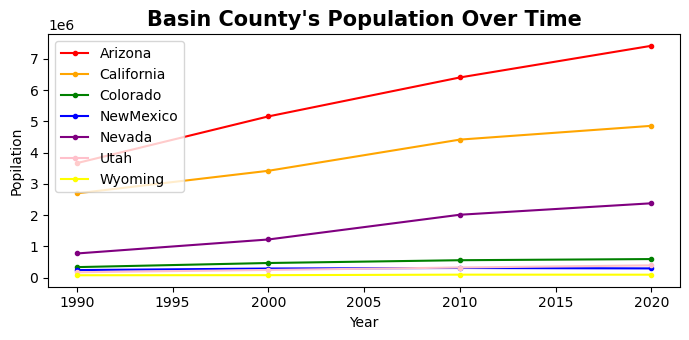

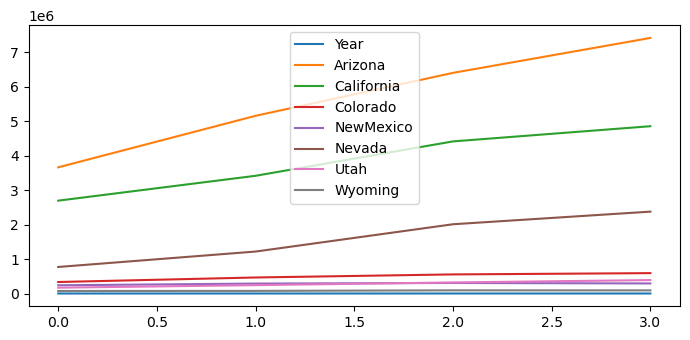

In [40]:
# Set the figure size
#plt.rcParams["figure.figsize"] = [7.00, 3.50]
#plt.rcParams["figure.autolayout"] = True

# Make a list of columns
#columns = ['Year', 'Arizona', 'California', 'Colorado','New Mexico','Nevada','Utah','Wyoming']

plt.plot(states_pop.Year, states_pop.Arizona,'b.-',label = 'Arizona',color='red')
plt.plot(states_pop.Year, states_pop.California,'b.-',label = 'California',color='orange')
plt.plot(states_pop.Year, states_pop.Colorado,'b.-',label = 'Colorado',color='green')
plt.plot(states_pop.Year, states_pop.NewMexico,'b.-',label = 'NewMexico',color='blue')
plt.plot(states_pop.Year, states_pop.Nevada,'b.-',label = 'Nevada',color='purple')
plt.plot(states_pop.Year, states_pop.Utah,'b.-',label = 'Utah',color='pink')
plt.plot(states_pop.Year, states_pop.Wyoming,'b.-',label = 'Wyoming',color='yellow')

plt.title("Basin County's Population Over Time", fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('Year')
plt.ylabel('Popilation')

plt.legend(loc='upper left')

# Plot the lines
states_pop.plot()

plt.show()


#honestly not 100% what the second graph is but the first looks good... maybe its the first df.year i did?